# WeatherPy
----

Data Analysis:

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#mini_cities = cities[:50]
#mini_cities

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
lat = []
long = []
max_temp = []
humid = []
clouds = []
winds = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval\n")

for city in cities:
    print("Processing Record " + str(cities.index(city)) + " | " + city)
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(1.01)
        
    except(KeyError):
        print("City not found!")
        pass
    
    
#response

Beginning Data Retrieval

Processing Record 0 | vaini
Processing Record 1 | barrow
Processing Record 2 | rikitea
Processing Record 3 | san patricio
Processing Record 4 | palmerston
Processing Record 5 | jamestown
Processing Record 6 | bredasdorp
Processing Record 7 | nikolskoye
Processing Record 8 | okhotsk
Processing Record 9 | rantepao
Processing Record 10 | hobart
Processing Record 11 | kodino
Processing Record 12 | amderma
City not found!
Processing Record 13 | new norfolk
Processing Record 14 | kasempa
Processing Record 15 | bandarbeyla
Processing Record 16 | dipkarpaz
City not found!
Processing Record 17 | kyra
Processing Record 18 | punta arenas
Processing Record 19 | cherskiy
Processing Record 20 | bengkulu
Processing Record 21 | belushya guba
City not found!
Processing Record 22 | maloshuyka
City not found!
Processing Record 23 | butaritari
Processing Record 24 | ponta do sol
Processing Record 25 | codrington
Processing Record 26 | yermakovskoye
Processing Record 27 | mys shmi

Processing Record 236 | nelson bay
Processing Record 237 | biratnagar
Processing Record 238 | balaipungut
Processing Record 239 | rundu
Processing Record 240 | rincon
Processing Record 241 | hambantota
Processing Record 242 | chara
Processing Record 243 | chapais
Processing Record 244 | sitka
Processing Record 245 | buariki
City not found!
Processing Record 246 | jati
Processing Record 247 | salisbury
Processing Record 248 | nedjo
Processing Record 249 | araouane
Processing Record 250 | port elizabeth
Processing Record 251 | kutum
Processing Record 252 | winton
Processing Record 253 | beipiao
Processing Record 254 | livingston
Processing Record 255 | ambilobe
Processing Record 256 | ixtapa
Processing Record 257 | cidreira
Processing Record 258 | sukumo
Processing Record 259 | aklavik
Processing Record 260 | madison heights
Processing Record 261 | strezhevoy
Processing Record 262 | ystad
Processing Record 263 | monkey bay
Processing Record 264 | dunmore east
Processing Record 265 | mehr

Processing Record 474 | laizhou
Processing Record 475 | khor
Processing Record 476 | moron
Processing Record 477 | enid
Processing Record 478 | taltal
Processing Record 479 | chagda
City not found!
Processing Record 480 | owando
Processing Record 481 | nabire
Processing Record 482 | cheney
Processing Record 483 | tutoia
Processing Record 484 | marsabit
Processing Record 485 | grand bend
Processing Record 486 | jieshi
Processing Record 487 | temerloh
Processing Record 488 | madisonville
Processing Record 489 | mount isa
Processing Record 490 | kloulklubed
Processing Record 491 | kahului
Processing Record 492 | batsfjord
Processing Record 493 | namatanai
Processing Record 494 | hualmay
Processing Record 495 | amlame
Processing Record 496 | vanavara
Processing Record 497 | laguna
Processing Record 498 | xichang
Processing Record 499 | bara
Processing Record 500 | kazalinsk
City not found!
Processing Record 501 | cartagena
Processing Record 502 | trelaze
Processing Record 503 | marawi
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)    
#weather_data.iloc[1,4] = 200
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.40,94,75,10.36,TO,1612633821
1,Barrow,71.2906,-156.7887,-0.40,71,90,10.36,US,1612633789
2,Rikitea,-23.1203,-134.9692,77.65,74,100,12.37,PF,1612633748
3,San Patricio,28.0170,-97.5169,68.00,77,90,9.22,US,1612633825
4,Palmerston,-12.4860,130.9833,82.40,83,75,11.50,AU,1612633827


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.788308,20.172336,50.356835,71.902351,53.605787,8.286962,1.612634e+09
std,32.906269,89.693784,32.759718,20.185675,38.474019,6.108569,2.749775e+02
min,-54.800000,-179.166700,-41.940000,13.000000,0.000000,0.430000,1.612634e+09
25%,-6.602400,-60.620600,31.440000,60.000000,18.000000,3.780000,1.612634e+09
50%,25.483300,25.833800,59.000000,78.000000,66.000000,6.620000,1.612634e+09
75%,47.666600,101.283300,77.000000,87.000000,90.000000,11.500000,1.612634e+09
max,78.218600,179.316700,95.230000,100.000000,100.000000,42.570000,1.612635e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data_clean = weather_data.loc[weather_data['Humidity'] <= 100, :]
#weather_data_clean

In [8]:
#  Get the indices of cities that have humidity over 100%.
damp_places = weather_data.index[weather_data['Humidity'] > 100].tolist()
damp_places

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(weather_data.index[damp_places], inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.40,94,75,10.36,TO,1612633821
1,Barrow,71.2906,-156.7887,-0.40,71,90,10.36,US,1612633789
2,Rikitea,-23.1203,-134.9692,77.65,74,100,12.37,PF,1612633748
3,San Patricio,28.0170,-97.5169,68.00,77,90,9.22,US,1612633825
4,Palmerston,-12.4860,130.9833,82.40,83,75,11.50,AU,1612633827


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

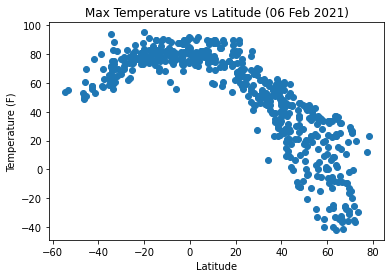

In [10]:
date_utc = time.gmtime(clean_city_data['Date'][0])

plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])

plt.title("Max Temperature vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("output_data/Temp_Lat")

## Latitude vs. Humidity Plot

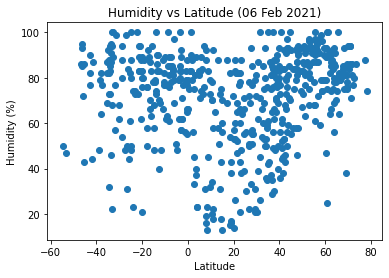

In [11]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])

plt.title("Humidity vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_Lat")

## Latitude vs. Cloudiness Plot

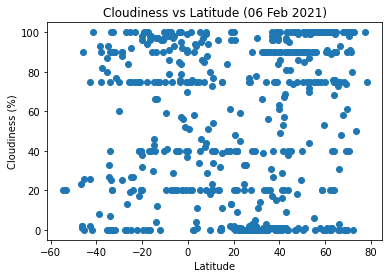

In [12]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])

plt.title("Cloudiness vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Cloud_Lat")

## Latitude vs. Wind Speed Plot

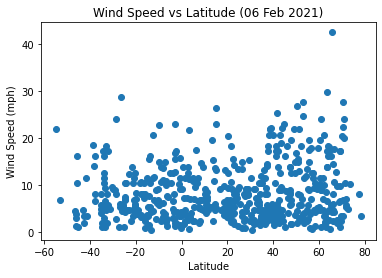

In [13]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])

plt.title("Wind Speed vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Wind_Lat")

## Linear Regression

In [14]:
lats = clean_city_data['Lat']
nth_lats = clean_city_data.loc[clean_city_data['Lat'] >= 0, :]
n_lats = nth_lats['Lat']

sth_lats = clean_city_data.loc[clean_city_data['Lat'] < 0, :]
s_lats = sth_lats['Lat']

n_max_temps = nth_lats['Max Temp']
s_max_temps = sth_lats['Max Temp']
import scipy.stats as st


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.85.

The linear regression model is y = -1.41x + 94.34.


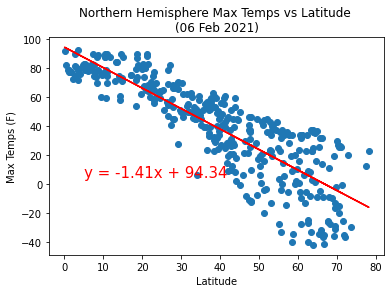

In [15]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(n_lats, n_max_temps)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_max_temps)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_max_temps)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

plt.title("Northern Hemisphere Max Temps vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Temp_NLat_reg")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.65.

The linear regression model is y = 0.48x + 85.1.


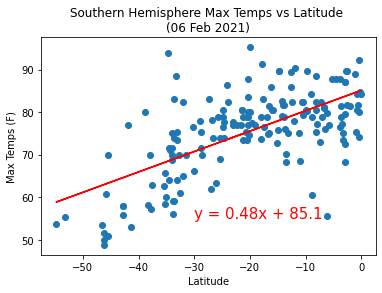

In [16]:
correlation = st.pearsonr(s_lats, s_max_temps)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_max_temps)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_max_temps)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Southern Hemisphere Max Temps vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Temp_SLat_reg")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.42.

The linear regression model is y = 0.45x + 52.89.


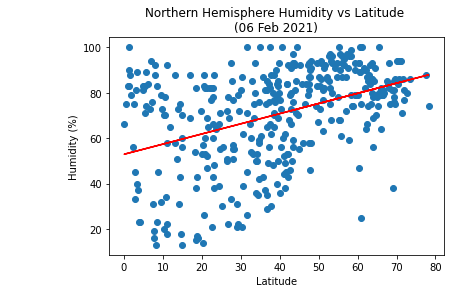

In [17]:
n_hums = nth_lats['Humidity']

correlation = st.pearsonr(n_lats, n_hums)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_hums)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_hums)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Northern Hemisphere Humidity vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_NLat_reg")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.03.

The linear regression model is y = 0.04x + 76.06.


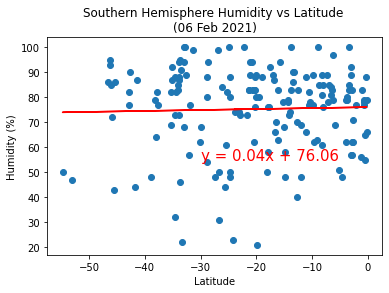

In [18]:
s_hums = sth_lats['Humidity']

correlation = st.pearsonr(s_lats, s_hums)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_hums)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_hums)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Southern Hemisphere Humidity vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_SLat_reg")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.28.

The linear regression model is y = 0.54x + 30.83.


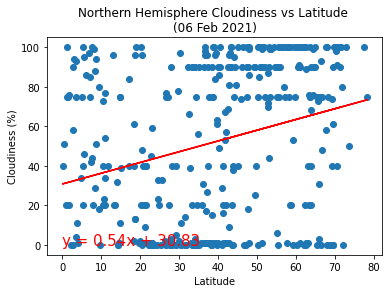

In [22]:
n_clouds = nth_lats['Cloudiness']

correlation = st.pearsonr(n_lats, n_clouds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_clouds)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_clouds)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

plt.title("Northern Hemisphere Cloudiness vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Clouds_NLat_reg")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.32.

The linear regression model is y = 0.87x + 74.49.


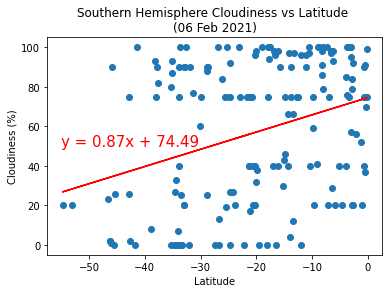

In [25]:
s_clouds = sth_lats['Cloudiness']

correlation = st.pearsonr(s_lats, s_clouds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_clouds)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_clouds)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

plt.title("Southern Hemisphere Cloudiness vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Clouds_SLat_reg")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.13.

The linear regression model is y = 0.04x + 6.9.


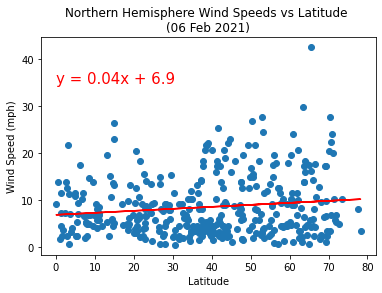

In [28]:
n_winds = nth_lats['Wind Speed']

correlation = st.pearsonr(n_lats, n_winds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_winds)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_winds)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

plt.title("Northern Hemisphere Wind Speeds vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Winds_NLat_reg")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.01.

The linear regression model is y = -0.0x + 7.62.


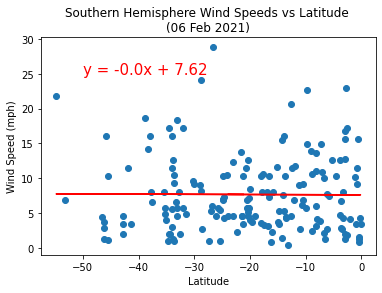

In [30]:
s_winds = sth_lats['Wind Speed']

correlation = st.pearsonr(s_lats, s_winds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_winds)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_winds)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.title("Southern Hemisphere Wind Speeds vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Winds_SLat_reg")